**Importing necessary libs**

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [106]:
pd.set_option('display.max_colwidth', 0)

---
**Preparing and cleaning data**

In [107]:
main_two_df = pd.read_csv('/datasets/egzamin_02.csv') # two stands for dataset about INF.02 qualification
main_three_df = pd.read_csv('/datasets/egzamin_03.csv') # three stands for dataset about INF.03 qualification


In [108]:
print(main_two_df.columns)
print(main_three_df.columns)

Index(['id', 'question', 'letter', 'answer', 'img'], dtype='object')
Index(['id', 'question', 'letter', 'answer', 'img'], dtype='object')


Columns in both datasets:
<ul>
<li>id - id pytania w bazie</li>
<li>question - exam question</li>
<li>letter - letter that correct answer is marked by (A or B or C or D)</li>
<li>answer - correct answer's text</li>
<li>img - question refers to an img (1) or no (0)</li>
</ul>

In [109]:
main_two_df.info()
print('--------------')
main_three_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1885 non-null   int64 
 1   question  1885 non-null   object
 2   letter    1885 non-null   object
 3   answer    1884 non-null   object
 4   img       1885 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 73.8+ KB
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        777 non-null    object 
 1   question  768 non-null    object 
 2   letter    763 non-null    object 
 3   answer    763 non-null    object 
 4   img       758 non-null    float64
dtypes: float64(1), object(4)
memory usage: 30.5+ KB


In [110]:
print('02: \n',main_two_df.isnull().sum())
print('\n03: \n',main_three_df.isnull().sum())

02: 
 id          0
question    0
letter      0
answer      1
img         0
dtype: int64

03: 
 id          0 
question    9 
letter      14
answer      14
img         19
dtype: int64


as we can see, we have null values in dataset, so i will just drop them

In [111]:
two_df = main_two_df.dropna()
three_df = main_three_df.dropna()

In [112]:
print(f'INF.02 dataset has: {two_df.shape[0]} rows and {two_df.shape[1]} columns\n')
print(f'INF.03 dataset has: {three_df.shape[0]} rows anb {three_df.shape[1]} columns\n')
print(f'Both combined have {two_df.shape[0] + three_df.shape[0]} rows in {two_df.shape[1]} columns')


INF.02 dataset has: 1884 rows and 5 columns

INF.03 dataset has: 758 rows anb 5 columns

Both combined have 2642 rows in 5 columns


---
**EDA**

1) Let's view the most common words in questions and answers

In [113]:
def word_counting(data):
    questions_words = {}
    for question in data.question:
        words_temp = question.split()
        for word in words_temp:
            if word not in questions_words:
                questions_words[word] = 1
            else:
                questions_words[word] += 1

    answers_words = {}
    for answer in data.answer:
        words_temp = answer.split()
        for word in words_temp:
            if word not in answers_words:
                answers_words[word] = 1
            else:
                answers_words[word] += 1

    return questions_words, answers_words

In [114]:
two_questions = word_counting(two_df)[0]
two_answers = word_counting(two_df)[1]
three_questions = word_counting(three_df)[0]
three_answers = word_counting(three_df)[1]

Preparing data 

I will exclude concjunctions, pronouns and verbs becuase they give us no information what question is about

In [115]:
def create_words_dataframe(dict):
    data = {'Word': dict.keys(), 'Count': dict.values()}
    data_df = pd.DataFrame(data)
    data_df = data_df.sort_values(by='Count', ascending=False)

    return data_df

In [116]:
two_q_df = create_words_dataframe(two_questions)
two_a_df = create_words_dataframe(two_answers)
three_q_df = create_words_dataframe(three_questions)
three_a_df = create_words_dataframe(three_answers)

In [117]:
def drop_words(data):
    stopwords = ['w', 'jest', 'na', 'do', 'z', 'należy', 'W', 'to', 'się', 'i', 'o', 'Który', 'Aby', 'Na', 'Które', 'oraz', 'Do', 'nie', 'dla', 'umożliwia', 'aby', 'ma', 'za', 'są', 'użyć', 'służy', 'może', 'że', 'przez', 'lub', 'po', 'od', 'zastosować', 'Wskaż', 'który', 'to', 'będzie', 'a', 'można', 'przedstawiono', 'być']
    for row in data.Word:
        if row in stopwords:
            data.drop(data[data['Word'] == row].index, inplace=True)

    data = data.reset_index(drop=True)

    return data

In [118]:

two_q_df = drop_words(two_q_df)
two_a_df = drop_words(two_a_df)
three_q_df = drop_words(three_q_df)
three_a_df = drop_words(three_a_df)


In [123]:
print('The most common words in:',
'\n\nINF.02 questions - ', two_q_df['Word'][:15].to_list(),
'\n\nINF.02 answers - ', two_a_df['Word'][:15].to_list(),
'\n\n-------------------------\n\nINF.03 questions - ', three_q_df['Word'][:15].to_list(),
'\n\nINF.03 answers - ', three_a_df['Word'][:15].to_list()
)

The most common words in: 

INF.02 questions -  ['sieci', 'systemie', 'Windows', 'systemu', 'Linux', 'rysunku', 'danych', 'IP', 'komputera', 'polecenie', 'typu', 'adres', 'polecenia', 'pamięci', 'plików'] 

INF.02 answers -  ['sieci', 'IP', '2', '1', '4', 'adres', 'systemu', 'komputera', 'danych', 'dysku', 'DNS', 'zł', 'plików', '3', 'DHCP'] 

-------------------------

INF.03 questions -  ['języku', 'danych', 'PHP', 'HTML', 'JavaScript', 'CSS', 'SQL', 'kodu', 'tabeli', 'języka', 'pomocą', 'wartość', 'bazy', 'bazie', 'stronie'] 

INF.03 answers -  ['<', '>', 'FROM', 'SELECT', 'WHERE', 'danych', 'tabeli', '=', 'bazy', 'TABLE', 'strony', 'AND', 'wartość', '&&', '2']


<h3>INF.02</h3>
<ul>
<li>the most most common topic of questions is networking</li>
<li>the 2nd most common topic is operating systems</li>
<li>and the 3rd topic is hardware</li>
<li>there are more questions about Windows than Linux</li>
<li>there are a lot of questions about protocols</li>
</ul>
------------
<h3>INF.03</h3>
<ul>
<li>the order of the most common languages: php, html, js, css, sql</li>
<li>there are a lot of questions about databases</li>
<li>probably most of the questions are about analyzing some sort of code or algorithms</li>

---
2. Let's make some wordclouds

In [128]:
def create_wordcloud(data):
    text = ' '.join(word for word in data.Word)
    stopwords = set(STOPWORDS)
    stopwords.update(['w', 'jest', 'na', 'do', 'z', 'należy', 'W', 'to', 'się', 'i', 'o', 'Który', 'Aby', 'Na', 'Które', 'oraz', 'Do', 'nie', 'dla', 'umożliwia', 'aby', 'ma', 'za', 'są', 'użyć', 'służy', 'może', 'że', 'przez', 'lub', 'po', 'od', 'zastosować', 'Wskaż', 'który', 'to', 'będzie', 'a', 'można', 'przedstawiono', 'być'])

    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color='white').generate(text)

    return wordcloud

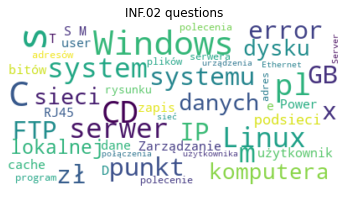

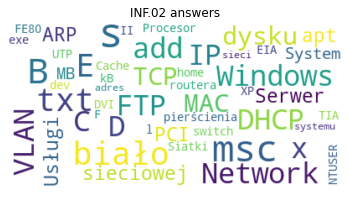

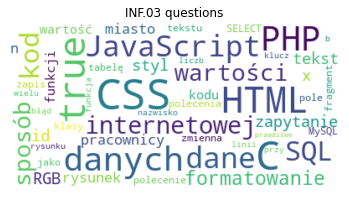

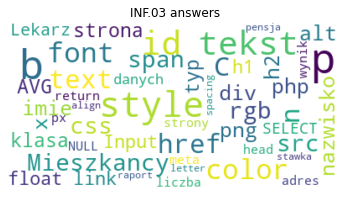

In [129]:
# 02 q 
two_q_wc = create_wordcloud(two_q_df)
two_q_wc.to_file('figs/02_questions_wc.png')
plt.figure()
plt.imshow(two_q_wc, interpolation='bilinear')
plt.axis('off')
plt.title('INF.02 questions')
plt.show()

# ----------------------
# 02 a 
two_a_wc = create_wordcloud(two_a_df)
two_a_wc.to_file('figs/02_answers_wc.png')
plt.figure()
plt.imshow(two_a_wc, interpolation='bilinear')
plt.axis('off')
plt.title('INF.02 answers')
plt.show()

# ---------------------------
# 03 q
three_q_wc = create_wordcloud(three_q_df)
three_q_wc.to_file('figs/03_questions_wc.png')
plt.figure()
plt.imshow(three_q_wc, interpolation='bilinear')
plt.axis('off')
plt.title('INF.03 questions')
plt.show()

# ------------------------------
# 03 a
three_a_wc = create_wordcloud(three_a_df)
three_a_wc.to_file('figs/03_answers_wc.png')
plt.figure()
plt.imshow(three_a_wc, interpolation='bilinear')
plt.axis('off')
plt.title('INF.03 answers')
plt.show()

---
3. Let's look at answers distributions

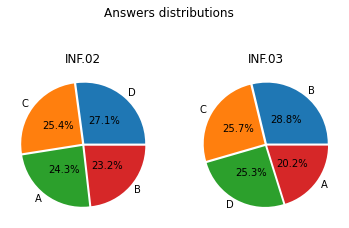

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Answers distributions')
ax1.pie(x=two_df['letter'].value_counts(), autopct="%.1f%%", explode=[0.025]*4, labels=['D','C','A','B'], pctdistance=0.5)
ax1.set_title('INF.02')
ax2.pie(x=three_df['letter'].value_counts(), autopct="%.1f%%", explode=[0.025]*4, labels=['B','C','D','A'], pctdistance=0.5)
ax2.set_title('INF.03')
fig.savefig('figs/answers_dist.png')
plt.show()


The most common answer in INF.02 exams is D and the most common answer in INF.03 exams is B

So, if we completely don't know the answer, we can check D or B (INF.02 or INF.03 respectively) to have the highest chance of getting a point

---
4. At the end, let's check how many questions refers to a picture

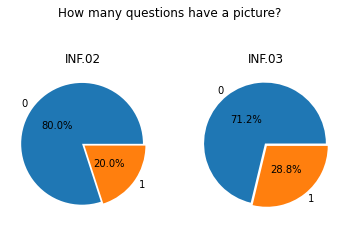

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('How many questions have a picture?')
ax1.pie(x=two_df['img'].value_counts(), autopct="%.1f%%", explode=[0.025]*2, labels=['0', '1'], pctdistance=0.5)
ax1.set_title('INF.02')
ax2.pie(x=three_df['img'].value_counts(), autopct="%.1f%%", explode=[0.025]*2, labels=['0', '1'], pctdistance=0.5)
ax2.set_title('INF.03')
fig.savefig('figs/img_dist.png')
plt.show()